In [1]:
%load_ext rpy2.ipython

##LoF

In [79]:
%%R
library("data.table")
d.cc.lof <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.No.dn.geneset.FMRP.lof.txt")


cLLK <- dim(d.cc.lof)[2]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


In [80]:
%%R
print(dim(d.cc.lof))
head(d.cc.lof)

[1] 47250     4
      V1 V2  V3       V4
1: 0.035  1 0.2 262.4035
2: 0.035  1 0.4 267.9796
3: 0.035  1 0.6 270.7151
4: 0.035  1 0.8 272.3642
5: 0.035  1 1.0 273.4720
6: 0.035  1 1.2 274.2662


In [81]:
%%R
library("ggplot2")

#d.cc.lof[plot(V1, -V8, xlab = 'pi')]

#p1 <- ggplot(d.cc.lof,aes(x= V1, y = -V8, group = V2)) + geom_point()
#print(p1)

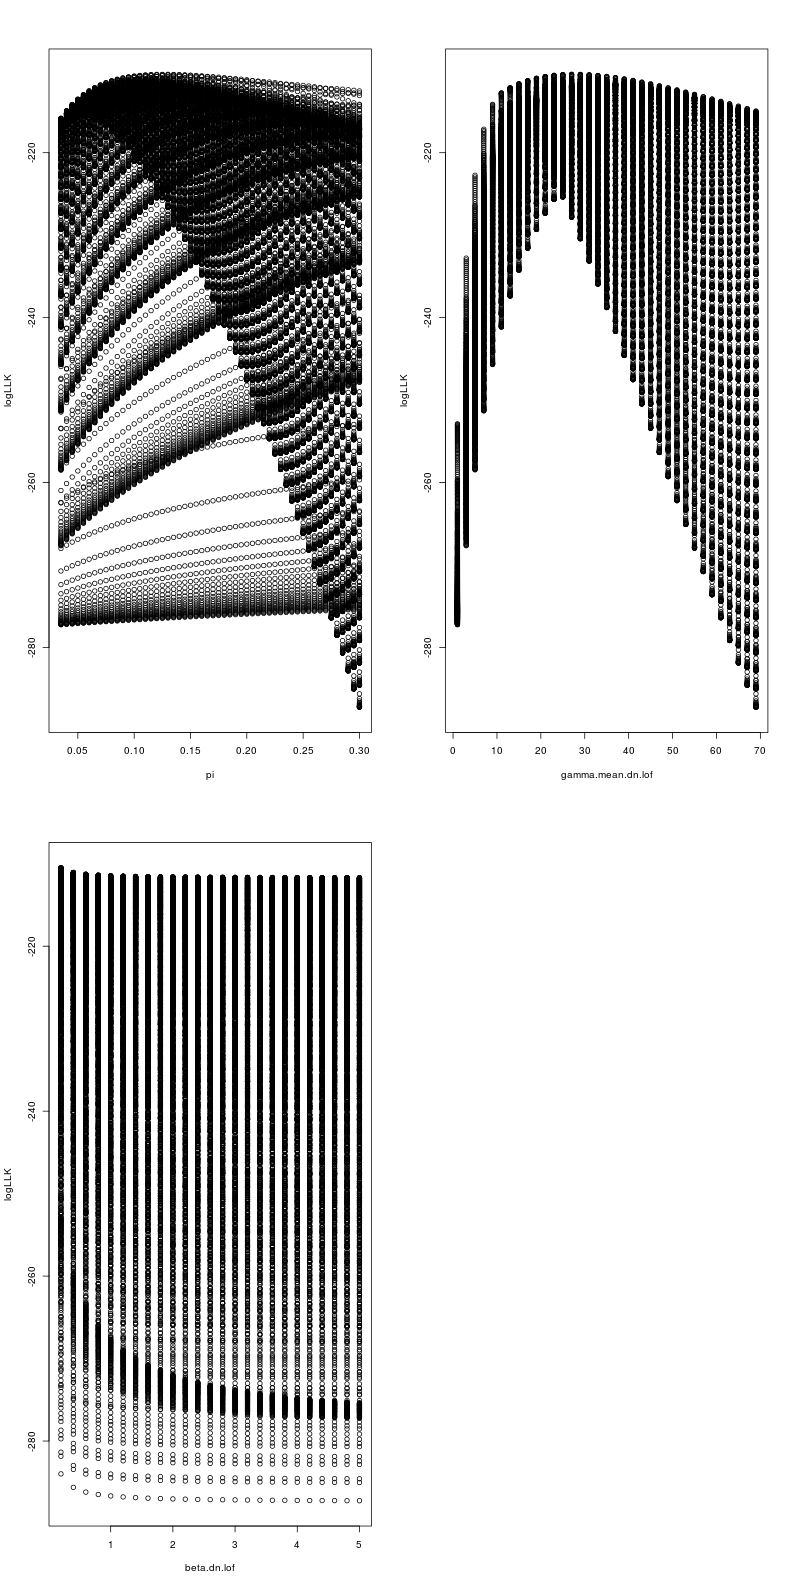

In [82]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.dn.lof", "beta.dn.lof", "rho1.lof")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

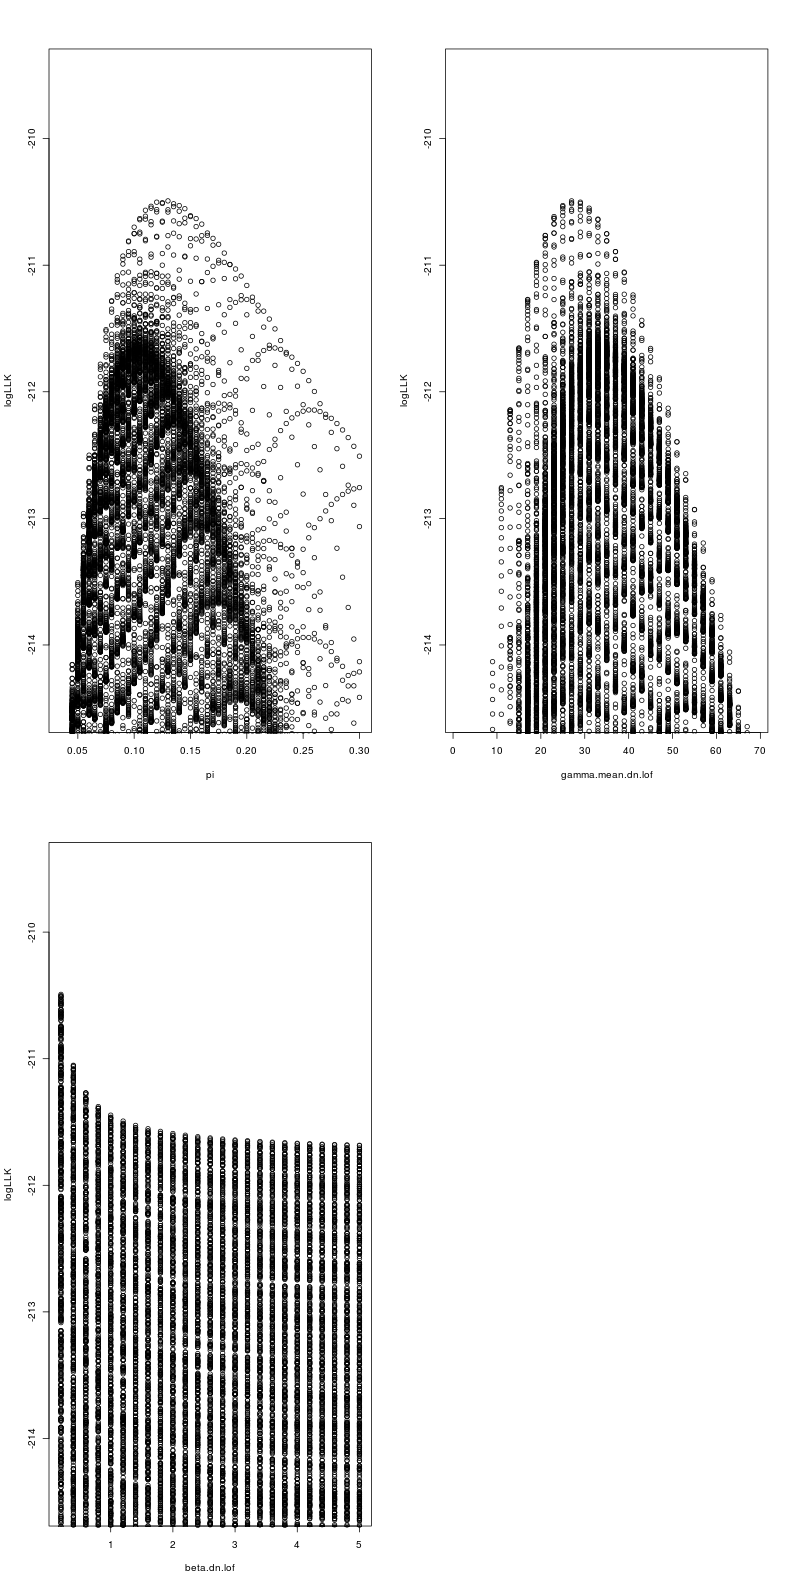

In [83]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof[[cLLK]]) + 1
lLimit <- uLimit - 5
d.cc.lof.1 <- d.cc.lof[V4>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [84]:
%%R
d.cc.lof.1[order(V4)]

          V1 V2  V3       V4
    1: 0.130 27 0.2 210.4917
    2: 0.120 29 0.2 210.5017
    3: 0.125 27 0.2 210.5062
    4: 0.125 29 0.2 210.5115
    5: 0.135 27 0.2 210.5146
   ---                      
47246: 0.300 69 4.2 287.2045
47247: 0.300 69 4.4 287.2124
47248: 0.300 69 4.6 287.2197
47249: 0.300 69 4.8 287.2263
47250: 0.300 69 5.0 287.2324


###Set limit for the proportion of protective variants and the frequency of variants

In [89]:
%%R
d.cc.lof.1 <- d.cc.lof[pgamma(1, V2*V3, rate = V3) < 10^-16]

#d.cc.lof.1 <- d.cc.lof.1[V4/V5 <= V6/V7]

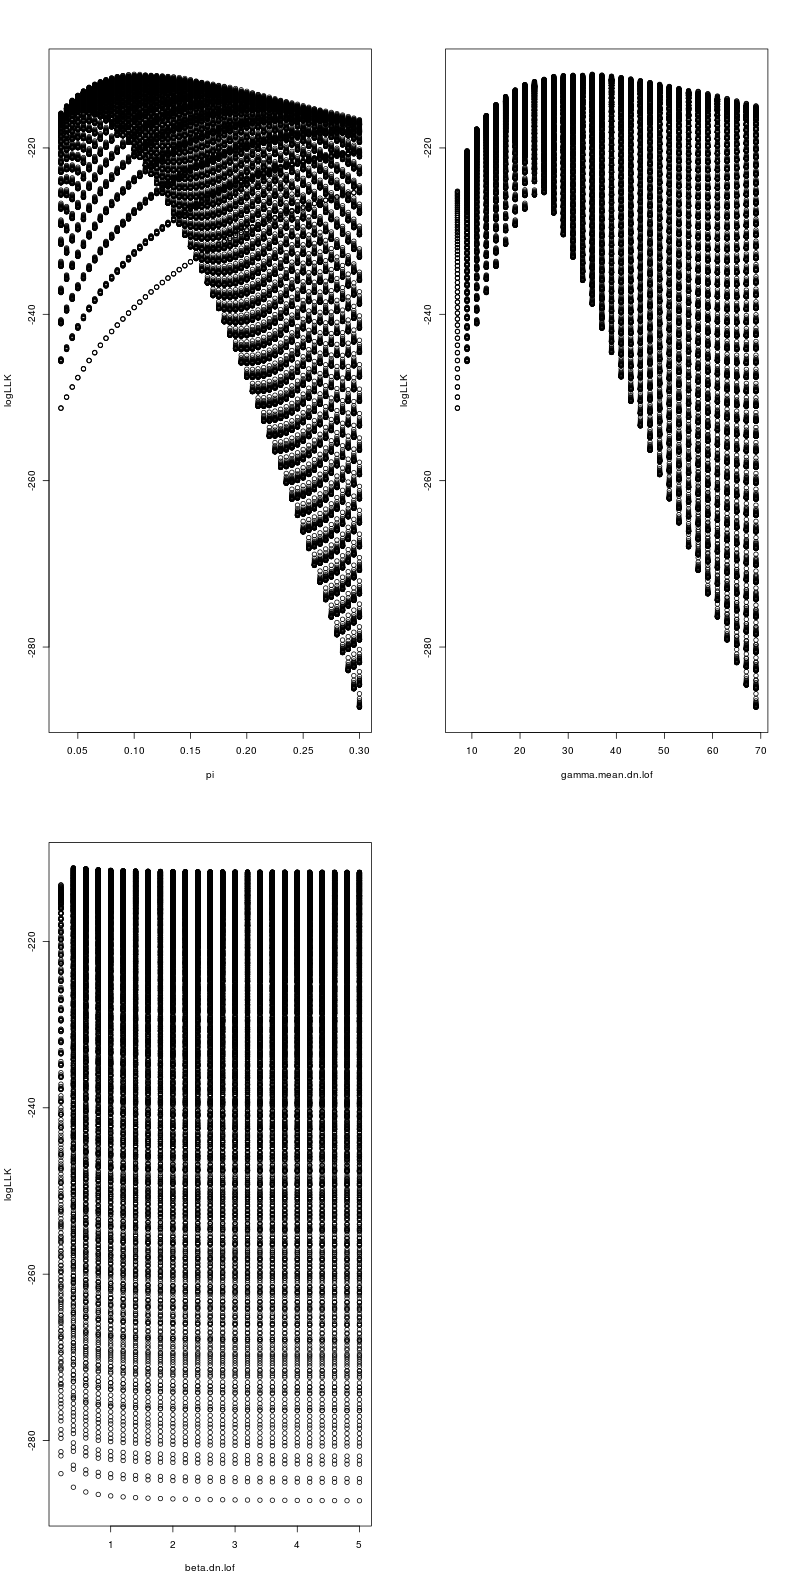

In [90]:
%%R -w 28 -h 56 -u cm

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

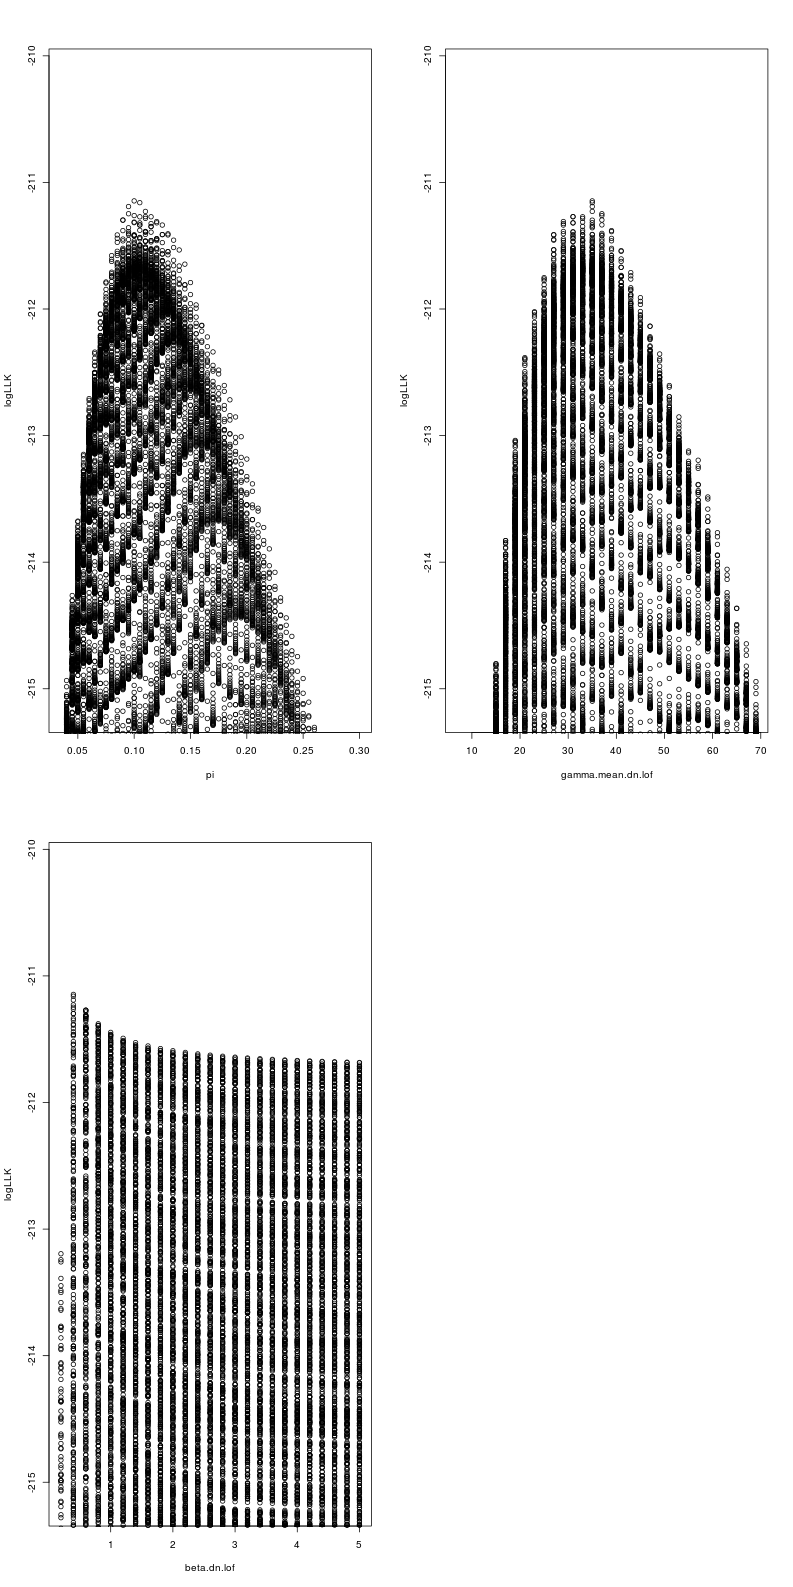

In [91]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 5
d.cc.lof.1 <- d.cc.lof.1[V4>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [92]:
%%R
head(d.cc.lof.1[order(V4)], 40)


       V1 V2  V3       V4
 1: 0.100 35 0.4 211.1458
 2: 0.105 35 0.4 211.1598
 3: 0.095 35 0.4 211.1904
 4: 0.110 35 0.4 211.2287
 5: 0.095 37 0.4 211.2474
 6: 0.100 37 0.4 211.2617
 7: 0.110 31 0.6 211.2703
 8: 0.115 31 0.6 211.2711
 9: 0.105 33 0.6 211.2714
10: 0.110 33 0.6 211.2840
11: 0.090 37 0.4 211.2968
12: 0.090 35 0.4 211.2979
13: 0.120 29 0.6 211.3088
14: 0.100 33 0.6 211.3133
15: 0.100 35 0.6 211.3178
16: 0.120 31 0.6 211.3193
17: 0.105 31 0.6 211.3196
18: 0.115 29 0.6 211.3249
19: 0.105 37 0.4 211.3353
20: 0.105 35 0.6 211.3366
21: 0.125 29 0.6 211.3366
22: 0.115 33 0.6 211.3477
23: 0.115 35 0.4 211.3492
24: 0.095 35 0.6 211.3580
25: 0.105 33 0.8 211.3780
26: 0.090 39 0.4 211.3806
27: 0.110 29 0.6 211.3873
28: 0.095 39 0.4 211.3888
29: 0.110 31 0.8 211.3897
30: 0.115 31 0.8 211.3929
31: 0.110 33 0.8 211.3930
32: 0.095 37 0.6 211.4023
33: 0.130 29 0.6 211.4057
34: 0.110 35 0.6 211.4105
35: 0.125 31 0.6 211.4121
36: 0.125 27 0.6 211.4122
37: 0.095 33 0.6 211.4133
38: 0.100 35

In [67]:
#!gist -p Test_no_combined_geneset_dn_FMRP.ipynb

In [68]:
!gist -u https://gist.github.com/855df023c23670fa84d6 Test_no_combined_geneset_dn_FMRP.ipynb

https://gist.github.com/855df023c23670fa84d6


##MIS3

In [100]:
%%R
library("data.table")

d.cc.mis3 <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.No.dn.geneset.FMRP.mis3.txt")



cLLK1 <- dim(d.cc.mis3)[2]
d.cc.mis3 <- d.cc.mis3[V4 != "NA"]
d.cc.mis3[[cLLK1]] <- -d.cc.mis3[[cLLK1]]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


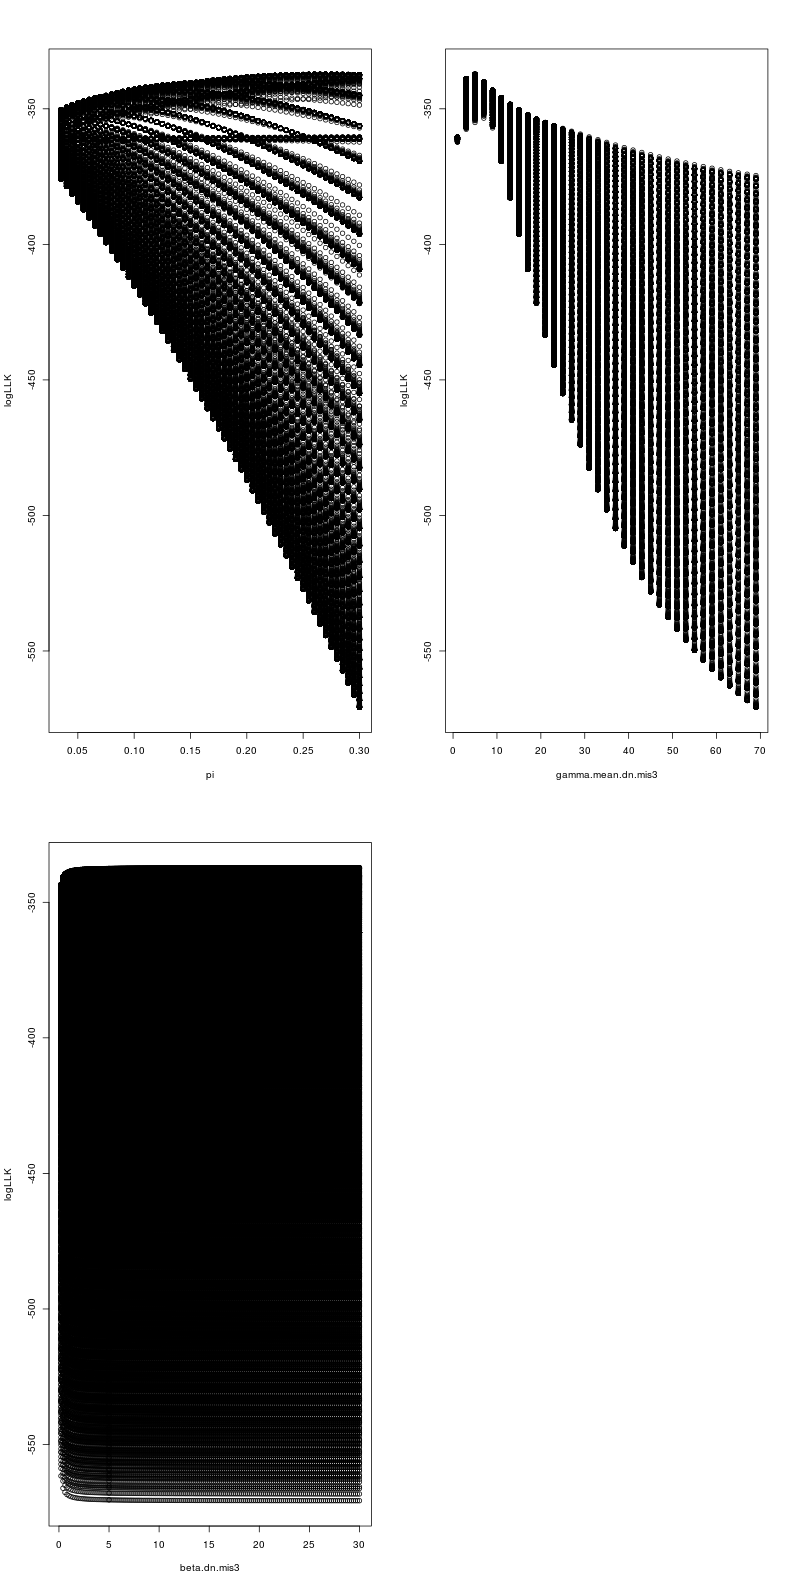

In [101]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.dn.mis3", "beta.dn.mis3")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    
    plot(d.cc.mis3[[ii]], d.cc.mis3[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK')
}

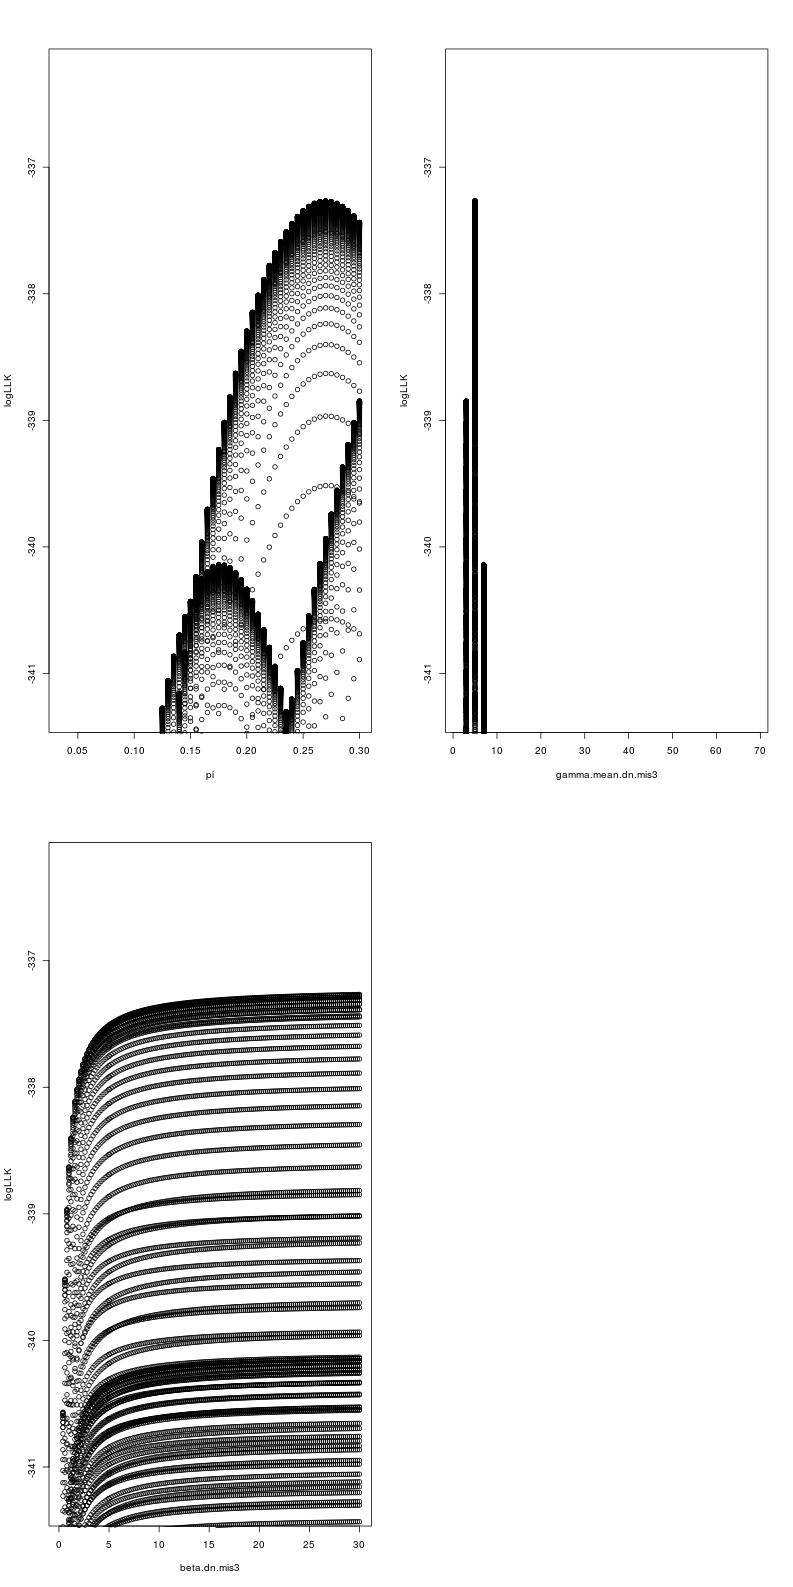

In [102]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3[[cLLK1]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3[[ii]], d.cc.mis3[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [103]:
%%R
d.cc.mis3.1 <- d.cc.mis3[pgamma(1, V2*V3, rate = V3) < 0.006]

#d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

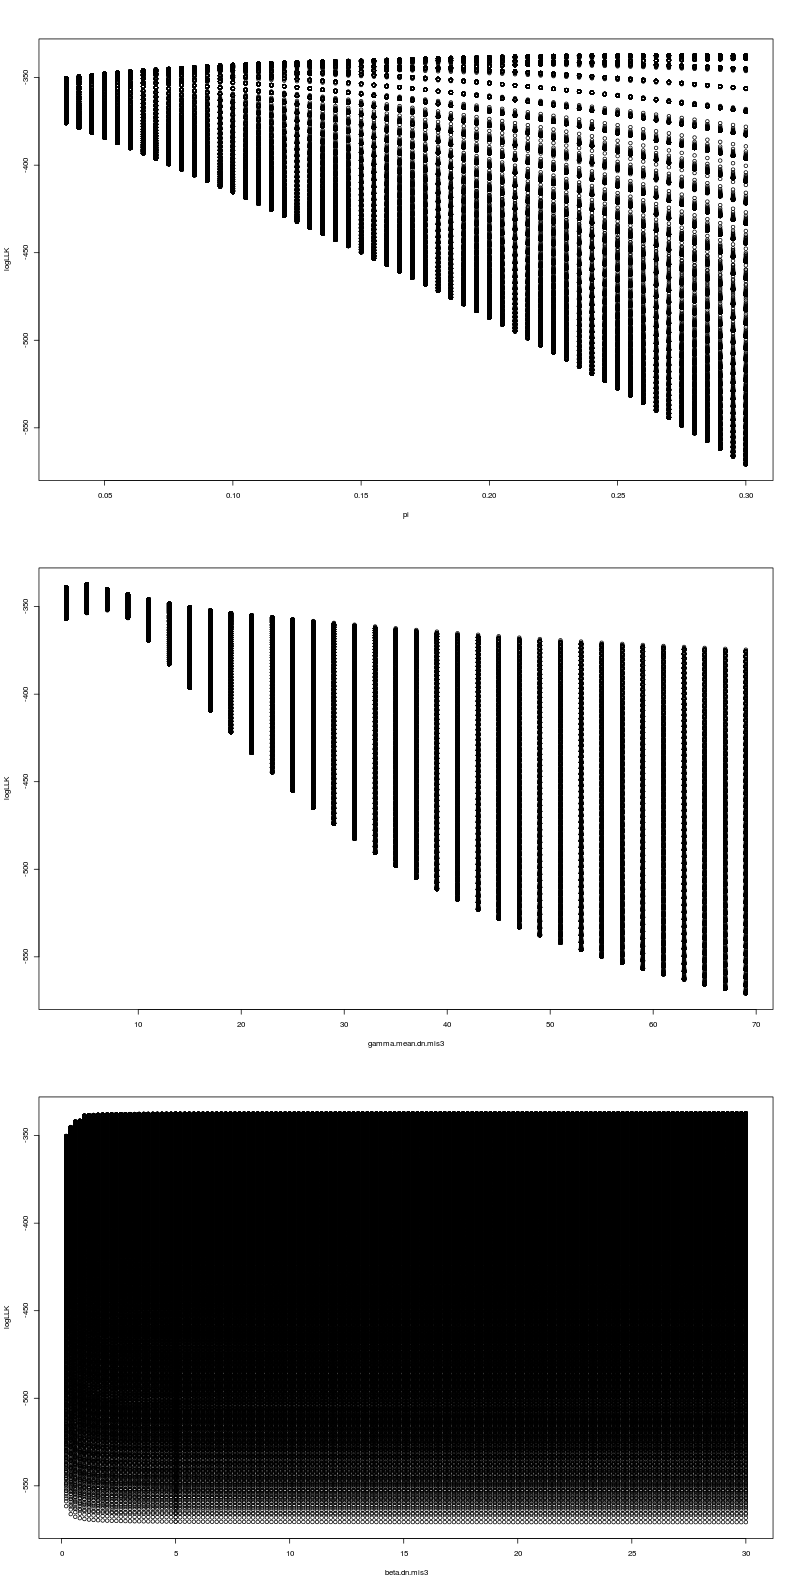

In [104]:
%%R -w 28 -h 56 -u cm


par(mfrow = c(3, 1))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

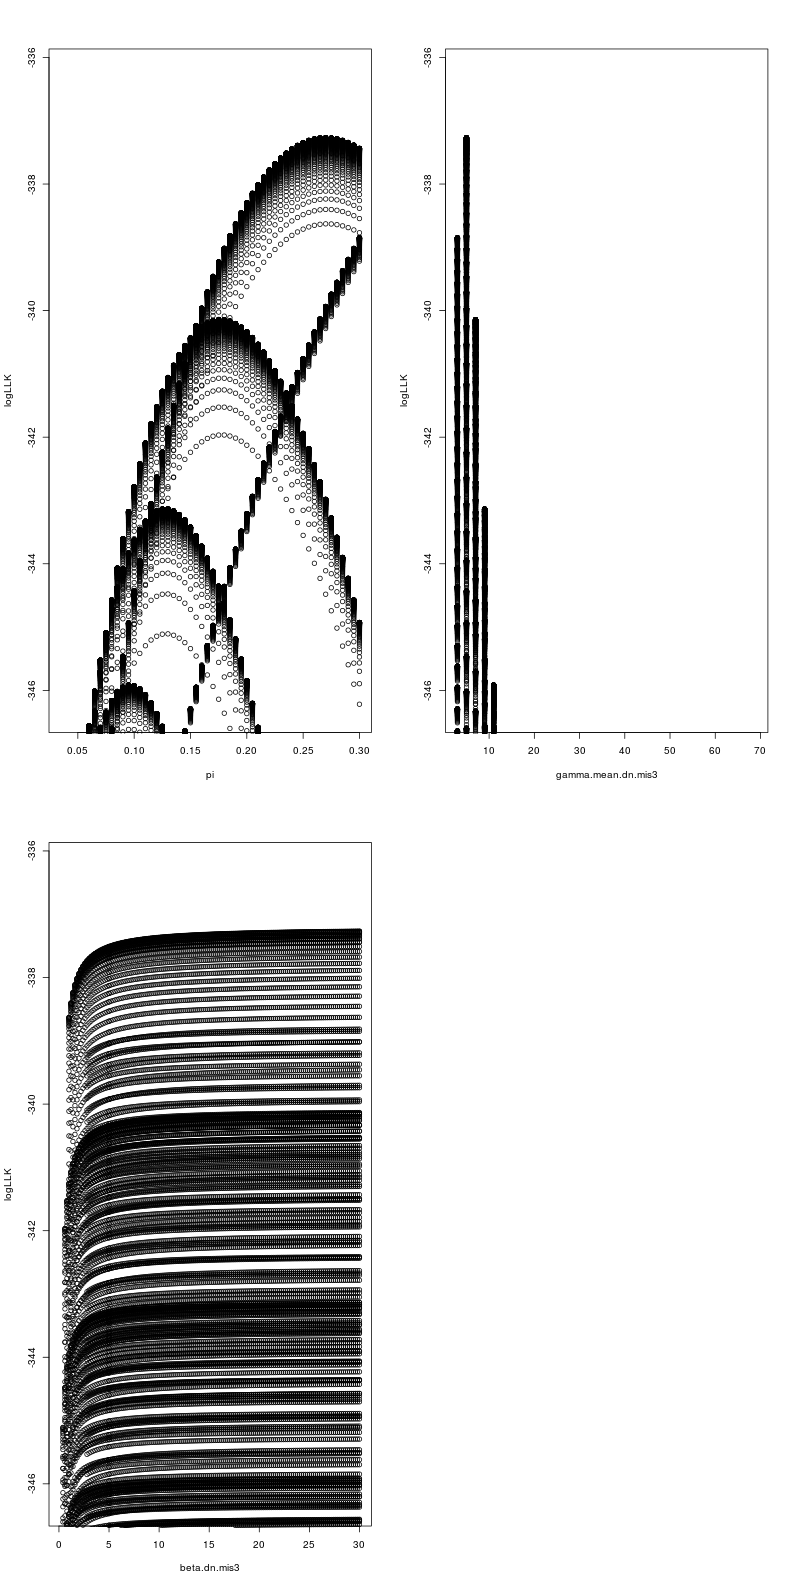

In [105]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3.1[[cLLK]]) + 1
lLimit <- uLimit - 10

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [106]:
%%R
head(d.cc.mis3.1[V4>=lLimit], 40)

       V1 V2   V3        V4
 1: 0.065  9  5.0 -346.1383
 2: 0.065  9  5.2 -346.1325
 3: 0.065  9  5.4 -346.1271
 4: 0.065  9  5.6 -346.1221
 5: 0.065  9  5.8 -346.1174
 6: 0.065  9  6.0 -346.1131
 7: 0.065  9  6.2 -346.1090
 8: 0.065  9  6.4 -346.1052
 9: 0.065  9  6.6 -346.1016
10: 0.065  9  6.8 -346.0982
11: 0.065  9  7.0 -346.0950
12: 0.065  9  7.2 -346.0920
13: 0.065  9  7.4 -346.0891
14: 0.065  9  7.6 -346.0864
15: 0.065  9  7.8 -346.0839
16: 0.065  9  8.0 -346.0814
17: 0.065  9  8.2 -346.0791
18: 0.065  9  8.4 -346.0769
19: 0.065  9  8.6 -346.0748
20: 0.065  9  8.8 -346.0728
21: 0.065  9  9.0 -346.0709
22: 0.065  9  9.2 -346.0690
23: 0.065  9  9.4 -346.0673
24: 0.065  9  9.6 -346.0656
25: 0.065  9  9.8 -346.0640
26: 0.065  9 10.0 -346.0624
27: 0.065  9 10.2 -346.0609
28: 0.065  9 10.4 -346.0595
29: 0.065  9 10.6 -346.0581
30: 0.065  9 10.8 -346.0568
31: 0.065  9 11.0 -346.0555
32: 0.065  9 11.2 -346.0542
33: 0.065  9 11.4 -346.0530
34: 0.065  9 11.6 -346.0519
35: 0.065  9 11.8 -3

###Beta = 1

In [107]:
%%R
d.cc.mis3.2 <- d.cc.mis3[(V3 < 1.2) & (V3>0.8)]

#d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

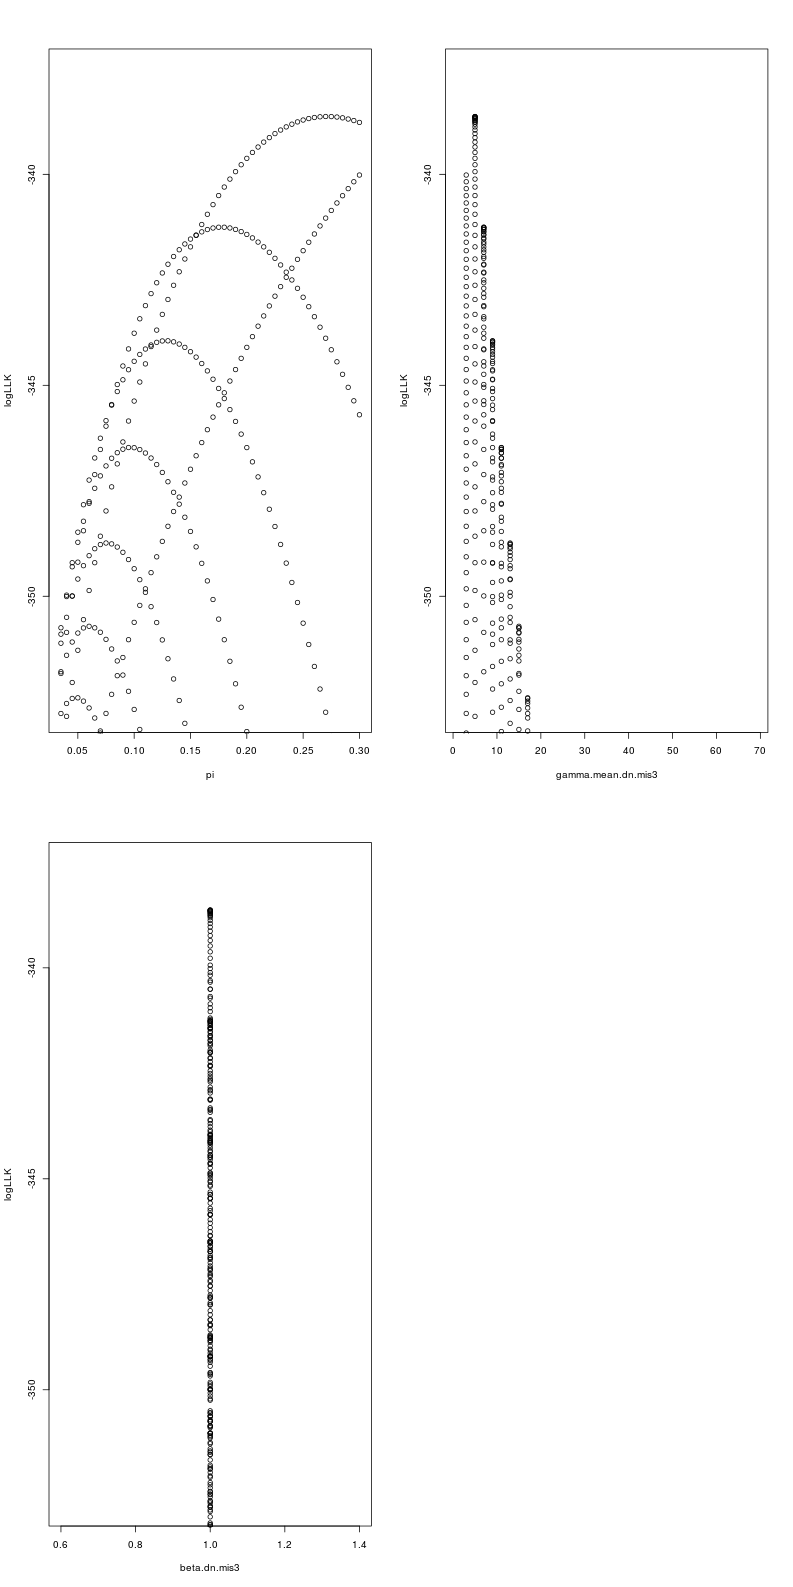

In [108]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3.2[[cLLK]]) + 1
lLimit <- uLimit - 15

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.2[[ii]], d.cc.mis3.2[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

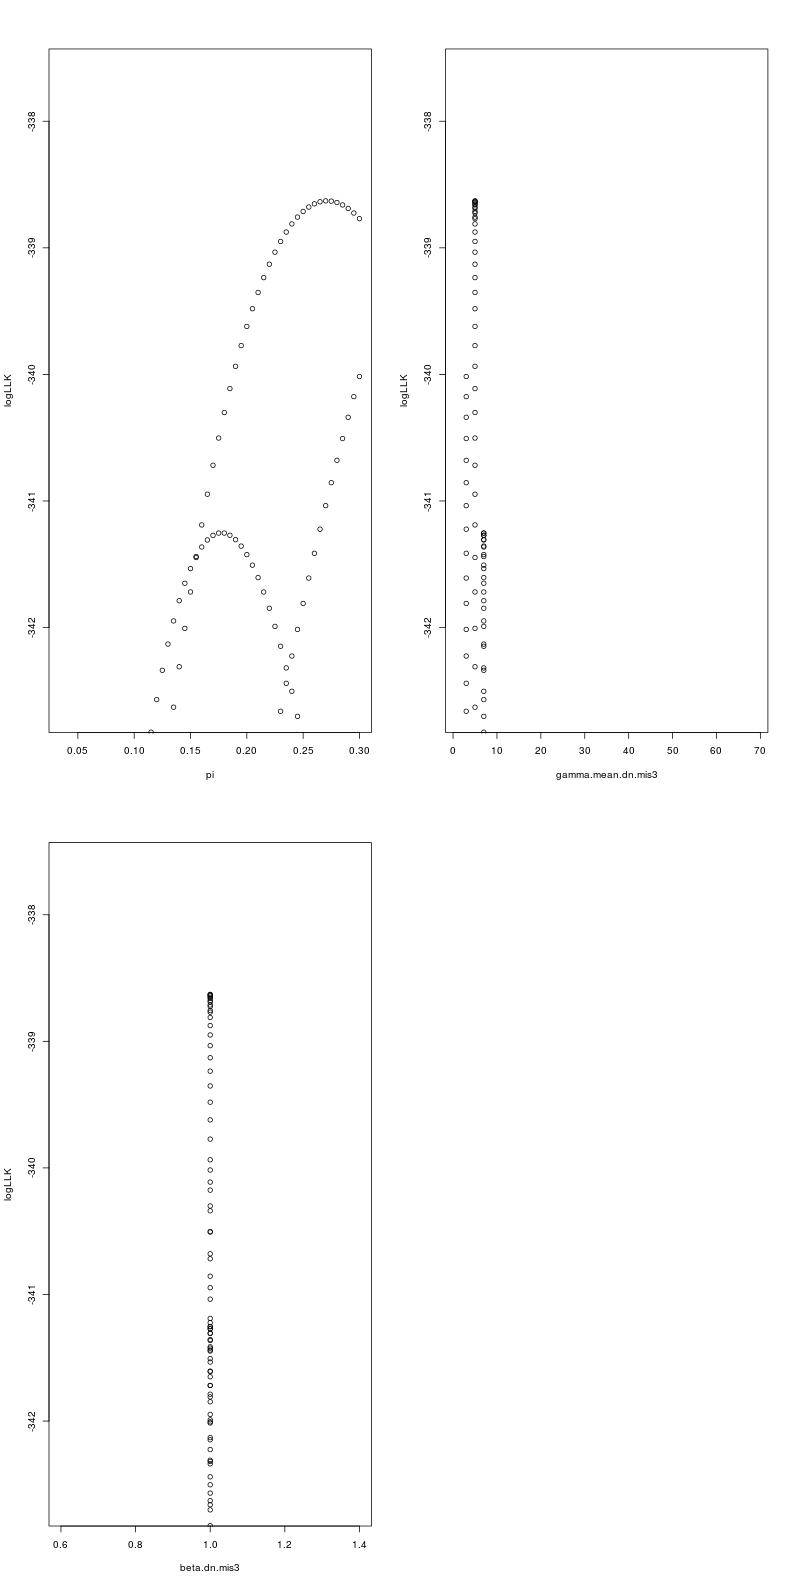

In [109]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3.2[[cLLK]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.2[[ii]], d.cc.mis3.2[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [111]:
%%R
head(d.cc.mis3.2)

      V1 V2 V3        V4
1: 0.035  1  1 -361.0898
2: 0.035  3  1 -356.8420
3: 0.035  5  1 -353.6920
4: 0.035  7  1 -351.7886
5: 0.035  9  1 -350.8975
6: 0.035 11  1 -350.7462
